# Branch and Bound

In [ ]:
import numpy as np
np.random.seed(0)

number_of_cities = 20

# randomly generate coordinates for each city
coordinates = np.random.randint(0, 100, (number_of_cities, 2))


Optimal Path: [0, 4, 8, 9, 5, 1, 7, 3, 6, 2, 0], Optimal Distance: 229.56173082991506


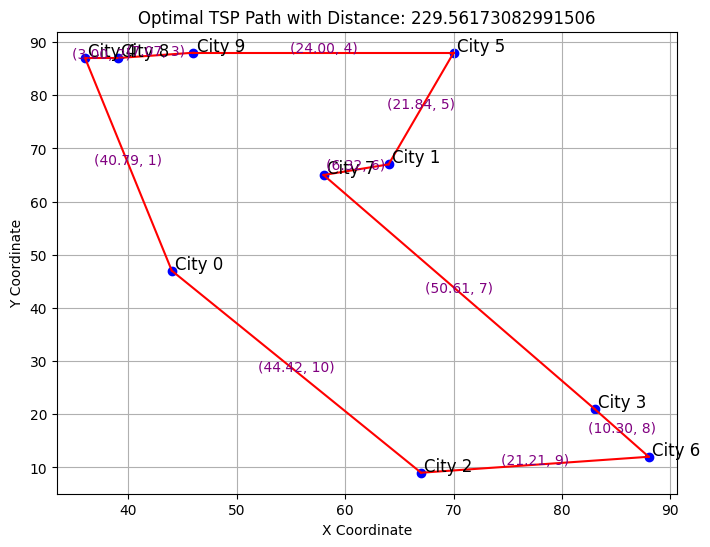

In [ ]:
import matplotlib.pyplot as plt
import heapq

# Function to calculate the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# Helper function to calculate the initial cost matrix and minimum edge costs for bounding
def create_cost_matrix(coordinates):
    n = len(coordinates)
    matrix = np.array([[euclidean_distance(coordinates[i], coordinates[j]) for j in range(n)] for i in range(n)])
    min_edge_cost = [min(row[i] for i in range(n) if i != j) for j, row in enumerate(matrix)]
    return matrix, min_edge_cost

# Branch and Bound TSP solution using a priority queue
def tsp_branch_and_bound(coordinates):
    n = len(coordinates)
    matrix, min_edge_cost = create_cost_matrix(coordinates)

    # Initialize the priority queue with (bound, cost, current path, visited cities)
    pq = []
    initial_bound = sum(min_edge_cost)  # Initial lower bound using minimum edges
    initial_path = [0]  # Start from city 0
    initial_visited = [False] * n
    initial_visited[0] = True  # Mark city 0 as visited

    # Push the initial state to the priority queue
    heapq.heappush(pq, (initial_bound, 0, initial_path, initial_visited))
    min_distance = float('inf')
    min_path = []

    # Explore paths using priority queue for best-first traversal
    while pq:
        bound, cost, path, visited = heapq.heappop(pq)

        # Skip this path if the bound is already worse than the best known solution
        if bound >= min_distance:
            continue

        # Get the last city in the current path
        last_city = path[-1]

        # If we have visited all cities, complete the path by returning to the starting city
        if len(path) == n:
            total_cost = cost + matrix[last_city][0]  # Add cost to return to the start
            if total_cost < min_distance:
                min_distance = total_cost
                min_path = path[:]  # Copy the current path as the best path found
            continue

        # Explore each possible next city
        for next_city in range(n):
            if not visited[next_city]:  # Only consider unvisited cities
                new_cost = cost + matrix[last_city][next_city]

                # Calculate a new bound (estimated minimum cost) if we choose next_city
                new_bound = new_cost + sum(min_edge_cost[i] for i in range(n) if not visited[i])

                # Continue only if this bound is promising (better than the best solution so far)
                if new_bound < min_distance:
                    # Mark next_city as visited and add it to the path
                    new_path = path + [next_city]
                    new_visited = visited[:]
                    new_visited[next_city] = True

                    # Add this new state to the priority queue
                    heapq.heappush(pq, (new_bound, new_cost, new_path, new_visited))

    # Return to the starting city to complete the cycle
    return min_path + [0], min_distance


# Solve the TSP
optimal_path, optimal_distance = tsp_branch_and_bound(coordinates)


if optimal_path:
    print(f"Optimal Path: {optimal_path}, Optimal Distance: {optimal_distance}")

    # Visualization with edge labels for distance and path sequence
    def plot_tsp_path(optimal_path, coordinates):
        plt.figure(figsize=(8, 6))
        for i, coord in enumerate(coordinates):
            plt.scatter(coord[0], coord[1], color='blue')
            plt.text(coord[0] + 0.3, coord[1] + 0.3, f"City {i}", fontsize=12)

        # Plot the optimal path with labels for (Distance, Path Sequence Number)
        for seq_num in range(len(optimal_path) - 1):
            start_city = optimal_path[seq_num]
            end_city = optimal_path[seq_num + 1]

            # Plot the edge
            plt.plot([coordinates[start_city][0], coordinates[end_city][0]],
                     [coordinates[start_city][1], coordinates[end_city][1]], 'r-')

            # Midpoint of the edge for labeling
            mid_x = (coordinates[start_city][0] + coordinates[end_city][0]) / 2
            mid_y = (coordinates[start_city][1] + coordinates[end_city][1]) / 2

            # Label with (Distance, Path Sequence Number)
            edge_distance = euclidean_distance(coordinates[start_city], coordinates[end_city])
            plt.text(mid_x, mid_y, f"({edge_distance:.2f}, {seq_num + 1})",
                     fontsize=10, color='purple', ha='center')

        plt.title(f"Optimal TSP Path with Distance: {optimal_distance}")
        plt.xlabel("X Coordinate")
        plt.ylabel("Y Coordinate")
        plt.grid(True)
        plt.show()

    # Plot the result
    plot_tsp_path(optimal_path, coordinates)
else:
    print("No valid path found for the given coordinates.")
